# Mean Reversion on SPY

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt

In [2]:
spy = yf.download("SPY")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,pct_change,log_ret
Date,,,,,,,,
2020-12-21,364.970001,378.459991,362.029999,367.859985,367.859985,96386700,-0.003576,-0.003582
2020-12-22,368.209991,368.329987,366.029999,367.239990,367.239990,47949000,-0.001685,-0.001687
2020-12-23,368.279999,369.619995,367.220001,367.570007,367.570007,46201400,0.000899,0.000898
2020-12-24,368.079987,369.029999,367.450012,369.000000,369.000000,26457900,0.003890,0.003883
2020-12-28,371.739990,372.589996,371.070007,372.170013,372.170013,39000400,0.008591,0.008554
2020-12-29,373.809998,374.000000,370.829987,371.459991,371.459991,53680500,-0.001908,-0.001910
2020-12-30,372.339996,373.100006,371.570007,371.989990,371.989990,49455300,0.001427,0.001426
2020-12-31,371.779999,374.660004,371.230011,373.880005,373.880005,78469000,0.005081,0.005068
2021-01-04,375.309998,375.450012,364.820007,368.790009,368.790009,110011700,-0.013614,-0.013708


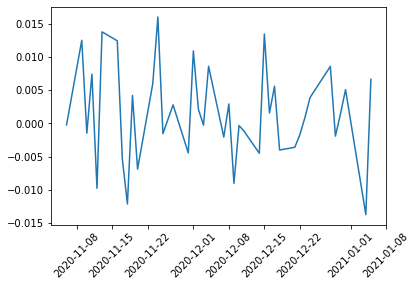

In [6]:
spy['pct_change'] = spy["Adj Close"].pct_change()
spy['log_ret'] = np.log(spy["Adj Close"]) - np.log(spy["Adj Close"].shift(1))
plt.plot(spy["log_ret"].iloc[-40:])
plt.xticks(rotation=45)
spy.iloc[-10:]


In [38]:
print(sm.tsa.stattools.adfuller(spy['log_ret'].dropna()))
spy['lag']=spy["log_ret"].shift()
spy.dropna(inplace=True)


(-15.13900448451794, 7.05464063226449e-28, 33, 6996, {'1%': -3.4312850630351637, '5%': -2.861953222701694, '10%': -2.566989954476151}, -42242.04000952232)


7029

In [36]:
model1=sm.OLS(endog=spy['log_ret'],exog=spy['lag'])
results1=model1.fit()
print(results1.summary())

                                 OLS Regression Results                                
Dep. Variable:                log_ret   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):              0.006
Method:                 Least Squares   F-statistic:                              44.26
Date:                Tue, 05 Jan 2021   Prob (F-statistic):                    3.09e-11
Time:                        03:05:26   Log-Likelihood:                          21232.
No. Observations:                7031   AIC:                                 -4.246e+04
Df Residuals:                    7030   BIC:                                 -4.246e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [39]:
model3=sm.tsa.ARIMA(endog=spy['log_ret'],exog=spy[['lag']],order=[1,1,0])
results3=model3.fit()
print(results3.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.log_ret   No. Observations:                 7028
Model:                 ARIMA(1, 1, 0)   Log Likelihood               21225.300
Method:                       css-mle   S.D. of innovations              0.012
Date:                Tue, 05 Jan 2021   AIC                         -42442.601
Time:                        03:09:07   BIC                         -42415.170
Sample:                             1   HQIC                        -42433.151
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0003      0.000      2.311      0.021    4.77e-05       0.001
lag                -1.0408      0.043    -24.150      0.000      -1.125      -0.956
ar.L1.D.log_ret    -0.0408      

C:\Users\smuke\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\smuke\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [55]:
start_index = '1999-11-25'
end_index = '1999-11-25'
forecast = model3.predict(1)

ValueError: shapes (7028,2) and (1,) not aligned: 2 (dim 1) != 1 (dim 0)